In [1]:
# importing the path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# importing the preprocessing libraries
import numpy as np
import pandas as pd

# importing the visualization
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 14,7
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# importing the Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report


/input/carsdata/cars.csv


In [2]:
# importing the dataset
dataset = pd.read_csv("../input/carsdata/cars.csv" , na_values=" ")
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [3]:
# checking the shape of the dataset
dataset.shape

(261, 8)

In [4]:
# checking for any missing values
dataset.isnull().sum()

mpg             0
 cylinders      0
 cubicinches    2
 hp             0
 weightlbs      3
 time-to-60     0
 year           0
 brand          0
dtype: int64

In [5]:
# replacing the names of the columns
dataset.columns = ["mpg" , "cylinders" , "cubicinches" , "hp" , "weightlbs" , "time-to-60", "year" , "brand"]
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350.0,165,4209.0,12,1972,US.
1,31.9,4,89.0,71,1925.0,14,1980,Europe.
2,17.0,8,302.0,140,3449.0,11,1971,US.
3,15.0,8,400.0,150,3761.0,10,1971,US.
4,30.5,4,98.0,63,2051.0,17,1978,US.


In [6]:
# Descriptive Stats
dataset.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,259.000000,261.000000,258.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,109.258305,40.499959,854.039019,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,99.500000,75.000000,2248.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2867.500000,16.000000,1977.000000
75%,28.800000,8.000000,303.000000,138.000000,3670.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [7]:
# descriptive Stats
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  259 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    258 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


#### Here brand is our target Variable

In [8]:
# replacing and filling the missing values
dataset["cubicinches"] = dataset["cubicinches"].replace(np.nan)
dataset["weightlbs"] = dataset["weightlbs"].replace(np.nan)

mean_cubicinches = dataset["cubicinches"].mean()
mean_weightlbs = dataset["weightlbs"].mean()

dataset["cubicinches"] = dataset["cubicinches"].replace(np.nan , mean_cubicinches)
dataset["weightlbs"] = dataset["weightlbs"].replace(np.nan , mean_weightlbs)


In [9]:
# looking at the data
dataset.info()

"""thus missing values is filled with mean values"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


'thus missing values is filled with mean values'

In [10]:
# Changing int64 to float64
dataset["cylinders"] = dataset["cylinders"].astype("float64")
dataset["hp"] = dataset["hp"].astype("float64")
dataset["time-to-60"] = dataset["time-to-60"].astype("float64")

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    float64
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    float64
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    float64
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(6), int64(1), object(1)
memory usage: 16.4+ KB


In [12]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8.0,350.0,165.0,4209.0,12.0,1972,US.
1,31.9,4.0,89.0,71.0,1925.0,14.0,1980,Europe.
2,17.0,8.0,302.0,140.0,3449.0,11.0,1971,US.
3,15.0,8.0,400.0,150.0,3761.0,10.0,1971,US.
4,30.5,4.0,98.0,63.0,2051.0,17.0,1978,US.


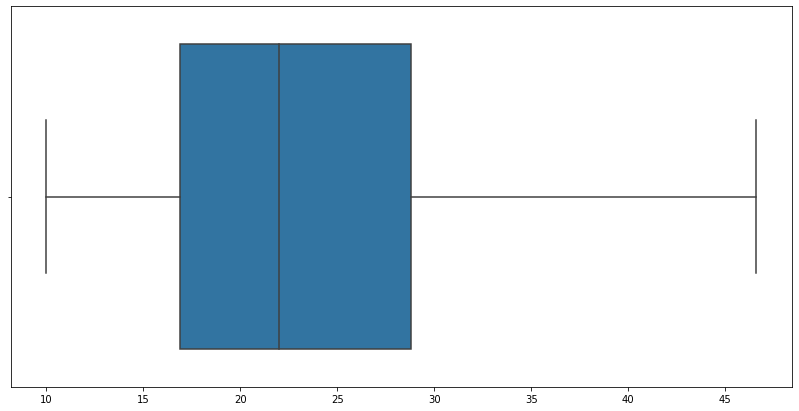

In [13]:
# Checking for any outliers
sns.boxplot(dataset[["mpg"]])

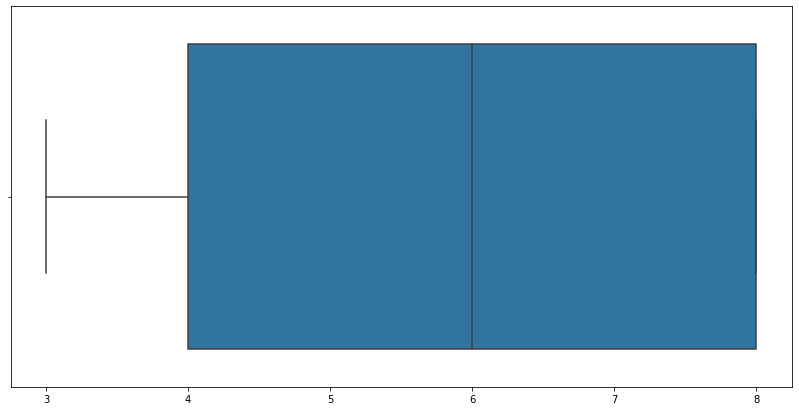

In [14]:
sns.boxplot(dataset[["cylinders"]])

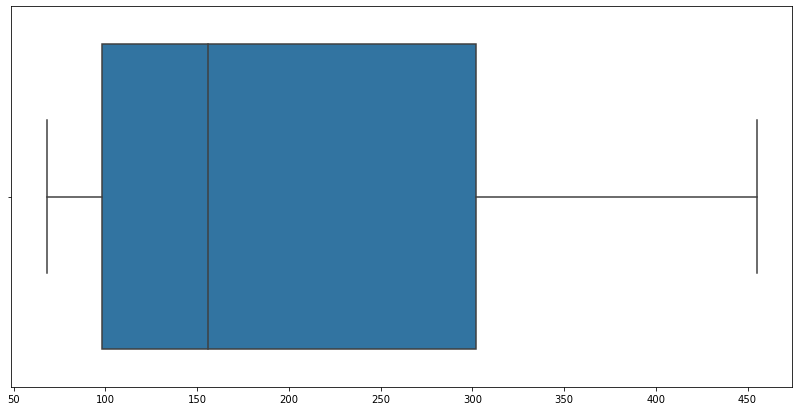

In [15]:
sns.boxplot(dataset[["cubicinches"]])


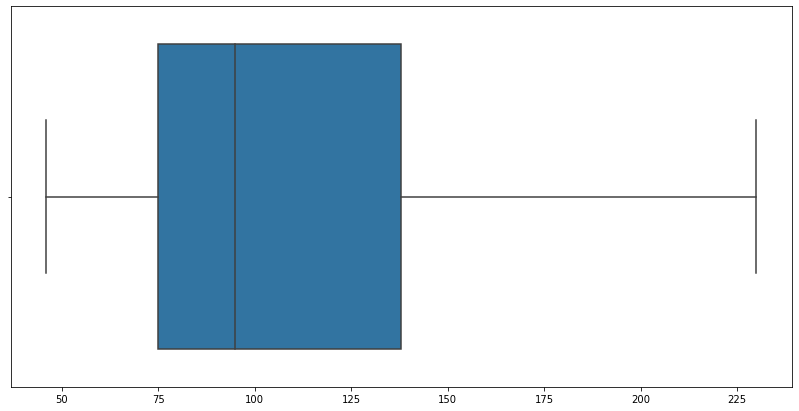

In [16]:
sns.boxplot(dataset[["hp"]])

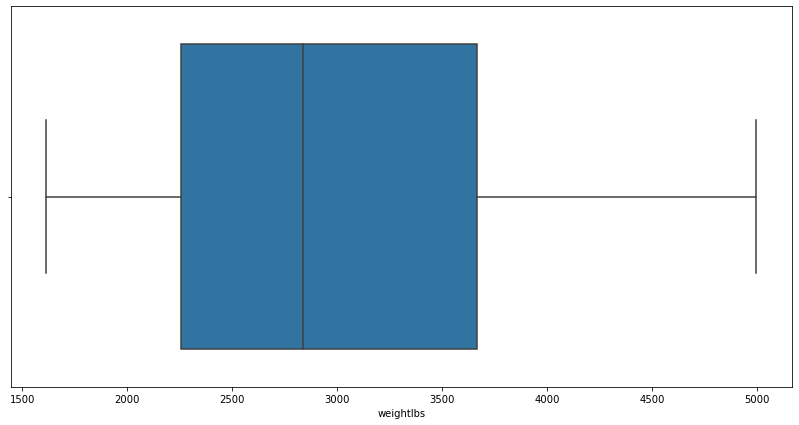

In [17]:
sns.boxplot(dataset["weightlbs"])


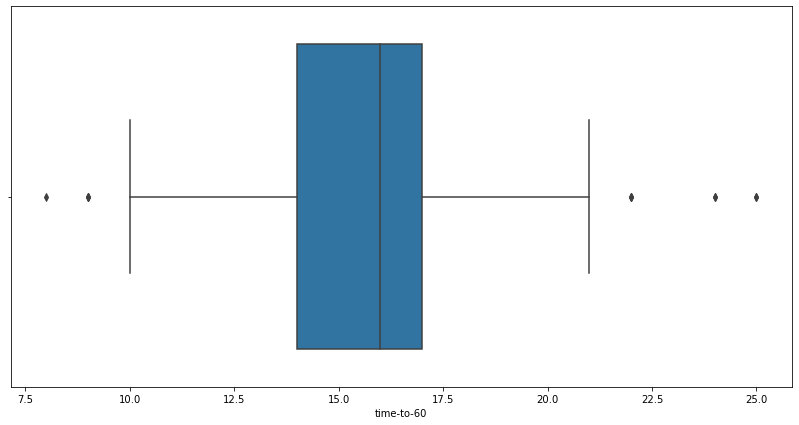

In [18]:
sns.boxplot(dataset["time-to-60"])

In [19]:
# Removing outliers in time-to-60 column by IQR method
Q1 = dataset["time-to-60"].quantile(0.25)
Q3 = dataset["time-to-60"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = IQR - (1.5 * Q1)
upper_bound = IQR + (1.5 * Q3)
print("Lower Bound of Boxplot: " , lower_bound)
print("Upper Bound of Boxplot: " , upper_bound)

# Removing the outliers
dataset["time-to-60"] = dataset[(dataset["time-to-60"] > lower_bound) & (dataset["time-to-60"] < upper_bound)]


Lower Bound of Boxplot:  -18.0
Upper Bound of Boxplot:  28.5


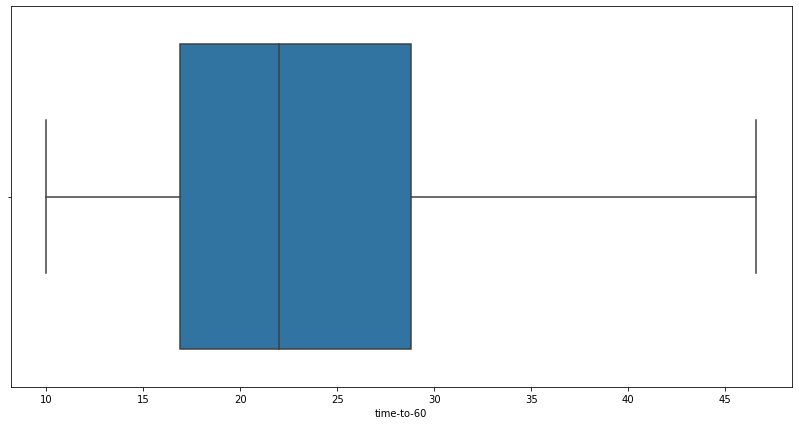

In [20]:

sns.boxplot(dataset["time-to-60"])

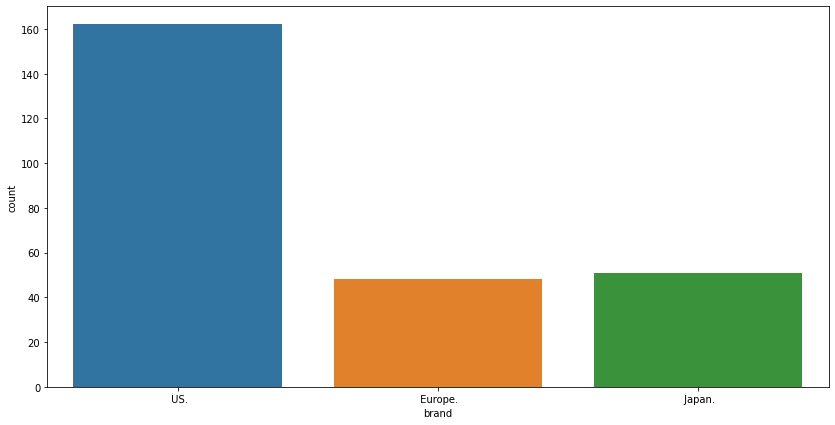

In [21]:
# making the count plot to understand the target variables
sns.countplot(dataset["brand"])

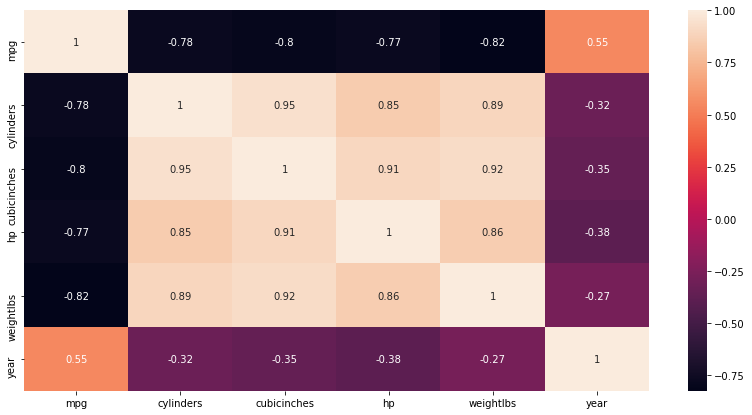

In [22]:
# understanding the correration between different features
corr_data = dataset.corr()
sns.heatmap(data = corr_data , annot = True)

#### Thus we can see that there is a very high relationship between different features

In [23]:
# changing year column
print(dataset["year"].max())
dataset["year"].min()

1983


1971

In [24]:
# making a new column in a dataset
dataset["old"] = dataset["year"].max() - dataset["year"]

# Dropping the year column
dataset.drop(["year"] , inplace = True , axis = 1)

In [25]:
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,brand,old
0,14.0,8.0,350.0,165.0,4209.0,14,US.,11
1,31.9,4.0,89.0,71.0,1925.0,31.9,Europe.,3
2,17.0,8.0,302.0,140.0,3449.0,17,US.,12
3,15.0,8.0,400.0,150.0,3761.0,15,US.,12
4,30.5,4.0,98.0,63.0,2051.0,30.5,US.,5


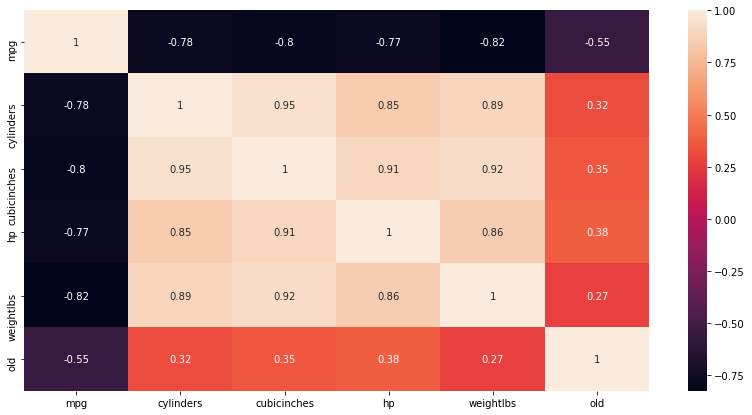

In [26]:
# checking the correration of the data
new_corr = dataset.corr()
sns.heatmap(data = new_corr , annot = True)

In [27]:
Target = dataset["brand"]
dataset.drop(["brand"] , axis = 1 , inplace = True)
dataset["Target"] = Target
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,old,Target
0,14.0,8.0,350.0,165.0,4209.0,14,11,US.
1,31.9,4.0,89.0,71.0,1925.0,31.9,3,Europe.
2,17.0,8.0,302.0,140.0,3449.0,17,12,US.
3,15.0,8.0,400.0,150.0,3761.0,15,12,US.
4,30.5,4.0,98.0,63.0,2051.0,30.5,5,US.


In [28]:
dataset["old"] = dataset["old"].astype("float64")
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,old,Target
0,14.0,8.0,350.0,165.0,4209.0,14,11.0,US.
1,31.9,4.0,89.0,71.0,1925.0,31.9,3.0,Europe.
2,17.0,8.0,302.0,140.0,3449.0,17,12.0,US.
3,15.0,8.0,400.0,150.0,3761.0,15,12.0,US.
4,30.5,4.0,98.0,63.0,2051.0,30.5,5.0,US.


In [29]:
# looking at the dataset
dataset.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,old,Target
0,14.0,8.0,350.0,165.0,4209.0,14,11.0,US.
1,31.9,4.0,89.0,71.0,1925.0,31.9,3.0,Europe.
2,17.0,8.0,302.0,140.0,3449.0,17,12.0,US.
3,15.0,8.0,400.0,150.0,3761.0,15,12.0,US.
4,30.5,4.0,98.0,63.0,2051.0,30.5,5.0,US.


## Now the dataset is perfect for Model Building

In [30]:
# splitting the dataset into independent(x) and dependent(y) variables
x = dataset.iloc[: ,: -1].values
y = dataset.iloc[: , -1].values
print(x)
print(y)

[[14.0 8.0 350.0 ... 4209.0 14.0 11.0]
 [31.9 4.0 89.0 ... 1925.0 31.9 3.0]
 [17.0 8.0 302.0 ... 3449.0 17.0 12.0]
 ...
 [22.0 6.0 232.0 ... 2835.0 22.0 0.0]
 [18.0 6.0 232.0 ... 3288.0 18.0 11.0]
 [22.0 6.0 250.0 ... 3353.0 22.0 6.0]]
[' US.' ' Europe.' ' US.' ' US.' ' US.' ' US.' ' US.' ' US.' ' Europe.'
 ' Japan.' ' Japan.' ' Europe.' ' US.' ' US.' ' US.' ' US.' ' Japan.'
 ' US.' ' Japan.' ' Europe.' ' Japan.' ' Europe.' ' US.' ' US.' ' Japan.'
 ' Japan.' ' Japan.' ' US.' ' US.' ' US.' ' Japan.' ' US.' ' Japan.'
 ' US.' ' Japan.' ' US.' ' Europe.' ' Japan.' ' US.' ' US.' ' US.' ' US.'
 ' US.' ' US.' ' US.' ' Japan.' ' US.' ' US.' ' Europe.' ' US.' ' US.'
 ' Europe.' ' US.' ' Europe.' ' US.' ' US.' ' Japan.' ' US.' ' Europe.'
 ' US.' ' US.' ' Japan.' ' Japan.' ' Japan.' ' US.' ' US.' ' Europe.'
 ' Japan.' ' Europe.' ' US.' ' US.' ' US.' ' Japan.' ' Japan.' ' Europe.'
 ' US.' ' US.' ' Japan.' ' Europe.' ' Japan.' ' US.' ' US.' ' US.'
 ' Europe.' ' Europe.' ' Japan.' ' US.' ' US.' ' US

In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)
print(y)

[2 0 2 2 2 2 2 2 0 1 1 0 2 2 2 2 1 2 1 0 1 0 2 2 1 1 1 2 2 2 1 2 1 2 1 2 0
 1 2 2 2 2 2 2 2 1 2 2 0 2 2 0 2 0 2 2 1 2 0 2 2 1 1 1 2 2 0 1 0 2 2 2 1 1
 0 2 2 1 0 1 2 2 2 0 0 1 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 1 2 0 0 0 2 1
 0 2 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 0 2 0 2 2 2 2 2 2 2 0 0 2 1 1 1 2 0 2 2
 2 2 1 1 2 2 0 2 1 1 2 0 2 2 2 2 0 2 2 2 1 2 1 0 0 2 2 0 2 2 2 1 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 0 2 0 0 1 0 2 2 2 2 2 1 2 2 1 1 2 1 0 2 1 1 2 2 2 2 0
 2 0 2 1 2 1 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 0 1 2 2 0 0 2 2 1 2 1 2
 2 2]


In [32]:
# Normalizing the x
x_data = x /x.max()  
x_data

array([[0.002801681008605163, 0.0016009605763458075, 0.07004202521512908,
        ..., 0.842305383229938, 0.002801681008605163,
        0.0022013207924754855],
       [0.006383830298178907, 0.0008004802881729037,
        0.017810686411847108, ..., 0.3852311386832099,
        0.006383830298178907, 0.0006003602161296778],
       [0.0034020412247348407, 0.0016009605763458075,
        0.06043626175705423, ..., 0.6902141284770863,
        0.0034020412247348407, 0.0024014408645187113],
       ...,
       [0.004402641584950971, 0.0012007204322593557,
        0.046427856714028416, ..., 0.5673404042425455,
        0.004402641584950971, 0.0],
       [0.003602161296778067, 0.0012007204322593557,
        0.046427856714028416, ..., 0.6579947968781269,
        0.003602161296778067, 0.0022013207924754855],
       [0.004402641584950971, 0.0012007204322593557, 0.05003001801080648,
        ..., 0.6710026015609366, 0.004402641584950971,
        0.0012007204322593557]], dtype=object)

In [33]:
# Now Splitting the dataset into training and testing dataset
x_train , x_test , y_train , y_test = train_test_split(x_data , y , test_size = .20 , random_state = None)

In [34]:
# applying knearest classifier
from sklearn.ensemble import RandomForestClassifier
forest_classifier = RandomForestClassifier(random_state = None)
forest_classifier.fit(x_train , y_train)

y_preg = forest_classifier.predict(x_test) 

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       1.00      0.73      0.84        11
           2       0.88      1.00      0.94        29

    accuracy                           0.89        53
   macro avg       0.90      0.83      0.86        53
weighted avg       0.89      0.89      0.88        53



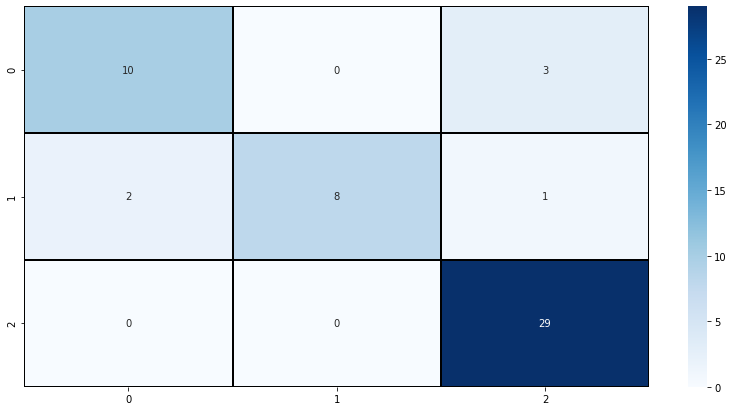

In [35]:
# Making the Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_preg)
sns.heatmap(data =  cm , annot = True , cmap = "Blues" , linewidths= 1 , linecolor= "black")

report = classification_report(y_test , y_preg)
print(report)